In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import csv
import re
from gaiaxpy import convert, calibrate, plot_spectra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gaiaxpy

In [3]:
def convert_csv(file_path):
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        with open(f'data-53-txt/{file_path[10:-4]}.txt', 'w') as txt_file:
            for row in csv_reader:
                txt_file.write(' '.join(row) + '\n')

In [4]:
directory = './data-53'

def get_unique_target_ids():
    arr = []
    for filename in os.listdir(directory):
        arr.append(filename.rsplit('_')[0])
    return list(set(arr))

target_ids = get_unique_target_ids()
target_ids

['775029739076581248',
 '3302846072717868416',
 '3079329274484276480',
 '4249667902270614272',
 '3918811315733520640',
 '2717594072113956352',
 '2687733913283870336',
 '266077145295627520',
 '3348071631670500736',
 '3304090857318319232',
 '2633603478379307904',
 '45980377978968064',
 '3935488605023787392',
 '4237169341286788096',
 '4016474027321256704',
 '3251244858154433536',
 '2405805697263561600',
 '6018034958869558912',
 '3652142603120146560',
 '2375647158466154112',
 '3257402879184420736',
 '4646535078125821568',
 '4452521234885949184',
 '3959631234670040704',
 '3629615946329315456',
 '2814629409239942272',
 '5024640977840398848',
 '1473687671071803520',
 '792588939773693568',
 '3944400490365194368',
 '984190381489031424',
 '3772994667772794112',
 '781164326766404736',
 '4922382445088509312',
 '3704392873141718912',
 '6210089815971933056',
 '418001477279154304',
 '6903096911032851584',
 '2901155648586891648',
 '2398029465700538880',
 '1510374147844219904',
 '6709878766312642944',


In [5]:
data_dict = {}

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        identifier, file_type = filename.rsplit('_', 1)[0], filename.rsplit('_', 1)[1].split('.')[0]

        # Read the file contents
        file_path = os.path.join(directory, filename)
        convert_csv(file_path)

In [6]:
def break_by_transit_ids(file_path):
    sections = []
    current_section = ""

    with open(file_path, 'r') as f:
        next(f)  # Skip the first line
        for line in f:
            line = line.strip()

            # Search for an integer longer than 10 digits, taking it as a delimiter
            id_match = re.search(r'\b\d{11,}\b', line)

            if id_match:
                if current_section:
                    sections.append(current_section.strip())

                # Start a new section
                current_section = line + "\n"
            else:
                current_section += line + "\n"

    # Add the last section if it exists
    if current_section:
        sections.append(current_section.strip())

    return sections


In [7]:
def parse_sections_into_dicts(sections):
    parsed_entities = []

    for section in sections:
        # Remove newline characters
        section = section.replace('\n', ' ')

        # Search for an integer ID (longer than 10 digits)
        id_match = re.search(r'\b\d{11,}\b', section)
        if id_match:
            entity_id = id_match.group()

            # Extract the two arrays
            arrays = [list(map(int, match.group().strip('[]').split())) for match in re.finditer(r'\[.*?\]', section)]
            if len(arrays) == 2:
                bp_array, rp_array = arrays

                # Create a dictionary for the entity
                entity_dict = {
                    'id': entity_id,
                    'bp_array': bp_array,
                    'rp_array': rp_array
                }

                parsed_entities.append(entity_dict)

    return parsed_entities

In [8]:
# metadata parsing
parsed_dir = 'data-53-txt/spdata'
targets_spectra = []


all_targets = {}


for filename in os.listdir(parsed_dir):
    identifier, file_type = filename.rsplit('_', 1)[0], filename.rsplit('_', 1)[1].split('.')[0]

    # Read the file contents
    file_path = os.path.join(parsed_dir, filename)
    sections_by_transit_id = break_by_transit_ids(file_path)
    parsed_entities_by_file = parse_sections_into_dicts(sections_by_transit_id)
    all_targets[filename] = parsed_entities_by_file

print(all_targets)

{'3918811315733520640_spdata.txt': [{'id': '111181289880965929', 'bp_array': [19820, 19862, 19884, 19911, 19983, 20016, 20074, 20147, 20241, 20315, 20486, 20634, 20869, 21379, 25649, 37354, 44961, 47661, 48902, 49277, 49292, 48945, 48487, 48162, 47716, 46682, 46605, 46052, 45172, 44852, 43503, 41534, 40418, 38462, 36548, 34021, 31099, 28374, 26361, 25089, 24315, 23919, 23632, 23308, 22799, 22678, 22597, 22386, 21999, 21329, 20743, 20441, 20196, 20026, 20025, 19977, 19927, 19900, 19878, 19839], 'rp_array': [29544, 29555, 29555, 29570, 29590, 29609, 29634, 29652, 29725, 29857, 30120, 30886, 32384, 33539, 33862, 33886, 33843, 34053, 34179, 34261, 34231, 34316, 34274, 34285, 34279, 34278, 34290, 34226, 34161, 34160, 34058, 33943, 33825, 33764, 33649, 33460, 33274, 33100, 32891, 32601, 32377, 32045, 31725, 31360, 31061, 30709, 30453, 30159, 29948, 29798, 29706, 29636, 29602, 29584, 29574, 29563, 29552, 29540, 29543, 29545]}, {'id': '111185382189098811', 'bp_array': [1819, 1838, 1870, 1875, 

- #transitid: Identifier for the transit, usually a unique number.
- obstime: Observation time, usually in ISO 8601 format.
- fluxbpint: Integrated flux in the blue photometric band.
- fluxbpinterror: Error in the integrated flux in the blue photometric band.
- fluxrpint: Integrated flux in the red photometric band.
- fluxrpinterror: Error in the integrated flux in the red photometric band.
- bpimagequality: Quality metric for the image in the blue photometric band.
- rpimagequality: Quality metric for the image in the red photometric band.
- nu: Frequency of the observed phenomena, usually in Hz.
- dnu: Error in the frequency.
- flagspe: Flag related to the spectral data; usually an integer where each bit may represent some condition or quality metric.
- provenance: Identifier to trace back the data, often an internal code.
- run: Run identifier, typically used for data processing.
- apflags: Flags related to aperture photometry.
- obsobmt: Likely another observation time metric, possibly in a different format or reference frame.
- bpwinal, bpwinac, rpwinal, rpwinac: Likely related to the window used for the blue and red photometric bands, possibly indicating the size and orientation of the window.

In [17]:
print(all_targets.keys())
print(all_targets["2448177130188111232_spdata.txt"][0])

dict_keys(['3918811315733520640_spdata.txt', '6903096911032851584_spdata.txt', '1510374147844219904_spdata.txt', '4646535078125821568_spdata.txt', '4452521234885949184_spdata.txt', '418001477279154304_spdata.txt', '3652142603120146560_spdata.txt', '4855735169813450624_spdata.txt', '266077145295627520_spdata.txt', '781164326766404736_spdata.txt', '3935488605023787392_spdata.txt', '2633603478379307904_spdata.txt', '3079329274484276480_spdata.txt', '3302846072717868416_spdata.txt', '6018034958869558912_spdata.txt', '2814629409239942272_spdata.txt', '3772994667772794112_spdata.txt', '792588939773693568_spdata.txt', '2375647158466154112_spdata.txt', '5639391810273308416_spdata.txt', '45980377978968064_spdata.txt', '2405805697263561600_spdata.txt', '2901155648586891648_spdata.txt', '6127333286605955072_spdata.txt', '3257402879184420736_spdata.txt', '3348071631670500736_spdata.txt', '4016474027321256704_spdata.txt', '2398029465700538880_spdata.txt', '6749419923164242816_spdata.txt', '22745910

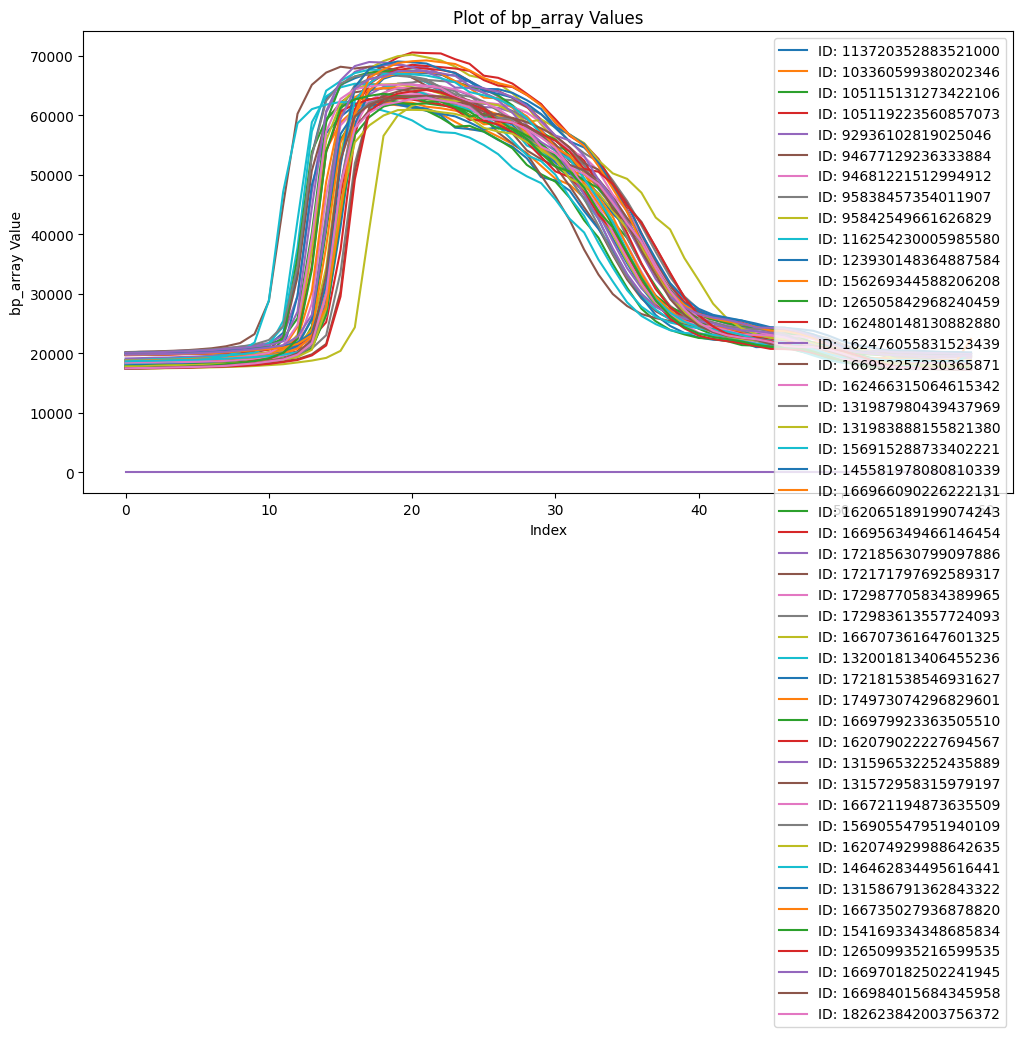

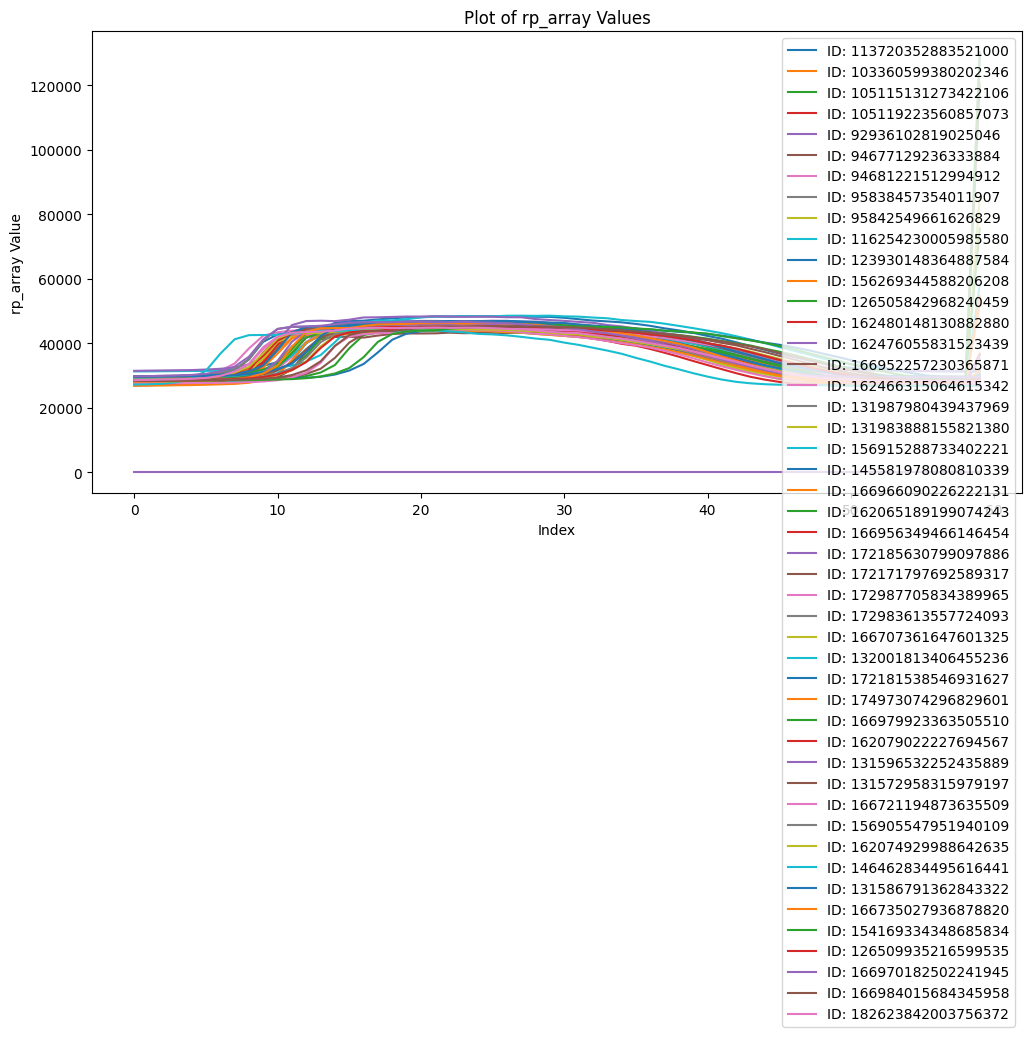

In [21]:
one_target_data = all_targets["2448177130188111232_spdata.txt"]

plt.figure(figsize=(12, 6))
for item in one_target_data:
    plt.plot(item['bp_array'], label=f"ID: {item['id']}")
plt.xlabel('Index')
plt.ylabel('bp_array Value')
plt.legend()
plt.title('Plot of bp_array Values')
plt.show()

# Plotting rp_array values
plt.figure(figsize=(12, 6))
for item in one_target_data:
    plt.plot(item['rp_array'], label=f"ID: {item['id']}")
plt.xlabel('Index')
plt.ylabel('rp_array Value')
plt.legend()
plt.title('Plot of rp_array Values')
plt.show()